In [7]:
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple mlxtend pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules #导入包

In [6]:
df_Retails = pd.read_excel('Online Retail.xlsx') #数据读入
df_Retails.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df_Retails.shape #调用shape属性查看数据框df_Retails的形状

(541909, 8)

In [8]:
df_Retails.columns #查看列名称

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df_Retails.describe() #对数据框df_Retails进行探索性分析

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df_Retails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df_Retails.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [12]:
df_Retails.isna().sum() #查看数据中是否有缺失值

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [18]:
df_Retails['Description'] = df_Retails['Description'].str.strip()

In [19]:
df_Retails.shape

(541909, 8)

In [20]:
df_Retails['Description'].isna().sum()

1455

In [21]:
df_Retails.dropna(axis=0
                 , subset=['Description']
                 ,inplace=True) #去除所有的缺失值

In [22]:
df_Retails.shape #再次查看数据集形状

(540454, 8)

In [23]:
df_Retails['Description'].isna().sum() # 检查此时的数据集是否还有缺失值

0

In [26]:
df_Retails['InvoiceNo'] = df_Retails['InvoiceNo'].astype('str')
df_Retails = df_Retails[~df_Retails['InvoiceNo'].str.contains('C')] #由于退货的订单由字母“C”开头，删除含有C字母的已取消订单

In [27]:
df_Retails.shape

(531166, 8)

In [29]:
df_ShoppingCarts = (df_Retails[df_Retails['Country'] =="Germany"]
                    .groupby(['InvoiceNo','Description'])['Quantity']
                    .sum()
                    .unstack()
                    .reset_index()
                    .fillna(0)
                    .set_index('InvoiceNo')) #只计算德国客户购买的商品的频繁项集及关联规则

df_ShoppingCarts.shape

(457, 1695)

In [31]:
df_ShoppingCarts.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_Retails.duplicated(subset=["InvoiceNo"]).any() #查看InvoiceNo列是否有重复的值

True

In [43]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
df_ShoppingCarts_sets = df_ShoppingCarts.applymap(encode_units) #将这些项在数据框中转换为0/1形式

In [44]:
df_Frequent_Itemsets = apriori(df_ShoppingCarts_sets
                             , min_support = 0.07
                             , use_colnames = True) #将最小支持度设定为0.07
df_Frequent_Itemsets

C:\Users\JasonL\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.072210,(GUMBALL COAT RACK)
3,0.091904,(JAM MAKING SET PRINTED)
4,0.078775,(JUMBO BAG RED RETROSPOT)
5,0.100656,(JUMBO BAG WOODLAND ANIMALS)
6,0.078775,(LUNCH BAG WOODLAND)
7,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
9,0.107221,(PLASTERS IN TIN SPACEBOY)


In [45]:
df_Frequent_Itemsets.shape #查看数据框df_Frequent_Itemsets的形状

(39, 2)

In [46]:
df_AssociationRules = association_rules(df_Frequent_Itemsets, metric = "lift", min_threshold = 1) 
#将提升度（lift）作为度量计算关联规则，并设置阈值为1，表示计算具有正相关关系的关联规则
df_AssociationRules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.102845,0.818381,0.091904,0.893617,1.091933,0.007738,1.707221,0.093844
1,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.818381,0.102845,0.091904,0.112299,1.091933,0.007738,1.010651,0.463569
2,(POSTAGE),(JUMBO BAG WOODLAND ANIMALS),0.818381,0.100656,0.087527,0.106952,1.062544,0.005152,1.007049,0.324096
3,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.100656,0.818381,0.087527,0.869565,1.062544,0.005152,1.392414,0.065450
4,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.818381,0.115974,0.100656,0.122995,1.060539,0.005746,1.008006,0.314301


In [47]:
df_AssociationRules.shape

(34, 10)

In [48]:
df_A = df_AssociationRules[(df_AssociationRules['lift'] > 2) & (df_AssociationRules['confidence'] >= 0.8)] 
#筛选提升度不小于2且置信度不小于0.8的关联规则
df_A

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.52954,0.837922
29,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)",(ROUND SNACK BOXES SET OF4 WOODLAND),0.150985,0.245077,0.124726,0.826087,3.370730,0.087724,4.34081,0.828405


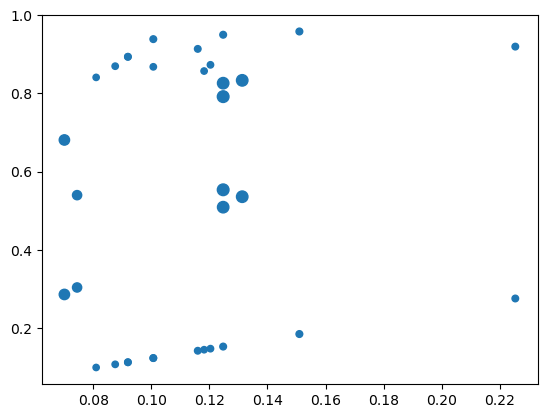

In [49]:
import matplotlib.pyplot as plt
 
#将点的大小放大20倍
plt.scatter(x = df_AssociationRules['support'], y = df_AssociationRules['confidence'], s = df_AssociationRules['lift'] * 20) 
 
plt.show()